<a href="https://colab.research.google.com/github/zzhu104/MAT494_HW/blob/main/HW4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.2 Spectral Clustering

Here we provide some examples of spectral clustering using scikit learn:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

Copyright:

In [1]:
import numpy as np
import scipy
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


1. From Laplacian to Clustering

In [2]:
# Computes the symetric normalized laplacian
# L = D^{-1/2} A D{-1/2}
def laplacian(A):
    D = numpy.zeros(A.shape)
    w = numpy.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)  # set the diag of D to w
    return D.dot(A).dot(D)

def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1231)
    return kmeans.fit(X).labels_

def spectral_clustering(affinity, n_clusters, cluster_method=k_means):
    L = laplacian(affinity)
    eig_val, eig_vect = scipy.sparse.linalg.eigs(L, n_clusters)
    X = eig_vect.real
    rows_norm = numpy.linalg.norm(X, axis=1, ord=2)
    Y = (X.T / rows_norm).T
    labels = cluster_method(Y, n_clusters)
    return labels

2. Use sklearn Functions

In [3]:
# Center for generating random data.
centers = [[1, 1], [-1, -1], [1, -1]]

# The number of data generated.
n_samples=3000

# Generate data.
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6, 
                  random_state =0)
 
# Transform to a matrix, the input has to be symmetric.
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()

# Set spectral clustering function.
n_clusters_= 4
lables = spectral_clustering(metrics_metrix,n_clusters=n_clusters_)

# Visualization of results
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    # Reassembles an array of True and False based on whether the values in lables are equal to k.
    my_members = lables == k
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

NameError: ignored

3. Kaggle Credit Card Dataset
Please download the dataset firs: https://www.kaggle.com/arjunbhasin2013/ccdata

Before loading the data, please change the file name to avoid blanks, and put it under the working path.

3.1 Preprocessing

In [4]:
# Load the data via relative path
X = pd.read_csv('../textbook/CC_GENERAL.csv')
  
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
  
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
  
X.head()

FileNotFoundError: ignored

In [5]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,0.996503,0.182248
1,0.936866,0.418409
2,0.290130,-0.900978
3,-0.992479,-0.022410
4,0.887119,0.527098


3.2 Build the model

In [6]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

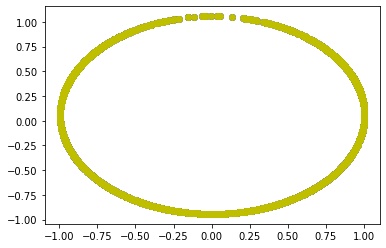

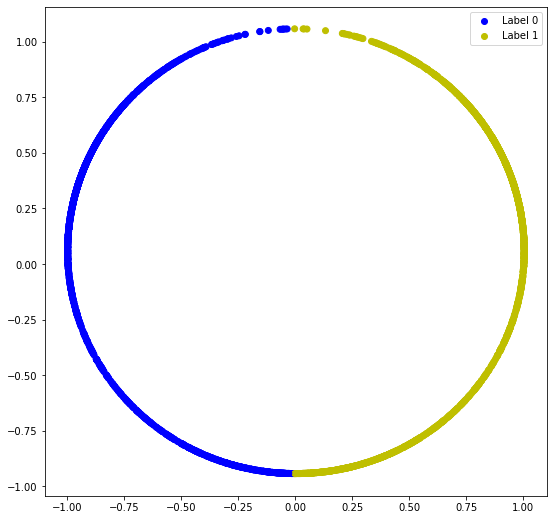

In [7]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [8]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

3.3 Evaluate the Performance

In [9]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores = []

# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))

print(s_scores)

[0.4299719691608422, 0.29238921970634874]


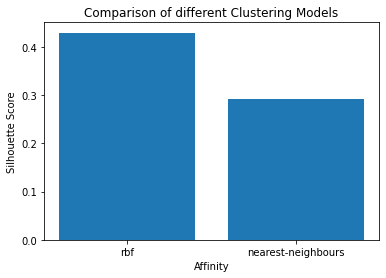

In [10]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()